# Demo PySpike functions
The notebook demonstrates PySpike metrics including ISI-distance, SPIKE-distance, and SPIKE-synchronization. Some code is adapted from the PySpike tutorials (http://mariomulansky.github.io/PySpike/#tutorial).  
Mario Mulansky, Thomas Kreuz, PySpike - A Python library for analyzing spike train synchrony, Software X 5, 183 (2016)

## Set-up

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython import display

import pyspike as spk

### Settings

In [2]:
# RATE = 30
# INTERVAL = [0, 1]
# N_NEURONS = 10

### Create output directory

In [3]:
dir_out = "../figures/demo_pyspike"
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

## Main

### Simulate spike trains

Text(0.5, 1.0, 'Poisson spike train 2')

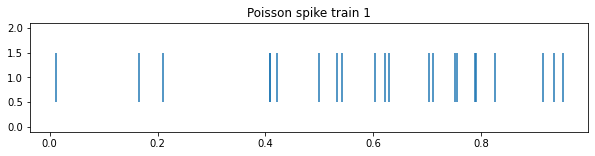

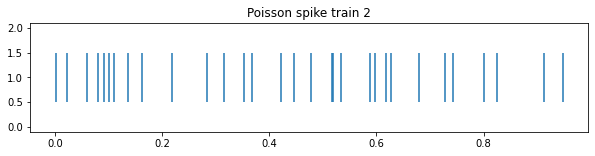

In [4]:
st1 = spk.generate_poisson_spikes(rate=30, interval=[0, 1])
st2 = spk.generate_poisson_spikes(rate=30, interval=[0, 1])

fig1, ax1 = plt.subplots(figsize=(10, 2))
ax1.eventplot(st1.spikes)
ax1.set_title("Poisson spike train 1")

fig2, ax2 = plt.subplots(figsize=(10, 2))
plt.eventplot(st2.spikes)
ax2.set_title("Poisson spike train 2")

### ISI-distance

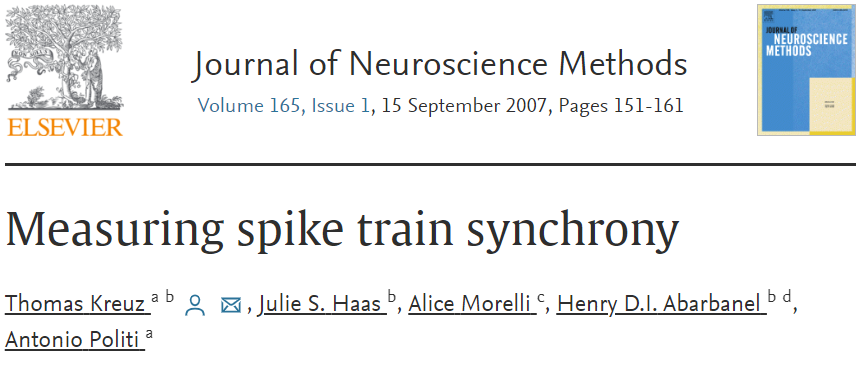

In [5]:
display.Image('../figures/ipynb_images/kruez_2007.png')

ISI-distance is computed as the ratio between the ISIs of two spike trains (at each time instance). This metric can also be used within a multivariate context.  
     
Advantages:
* Parameter free
* Timescale independent
* Firing-rate adaptive

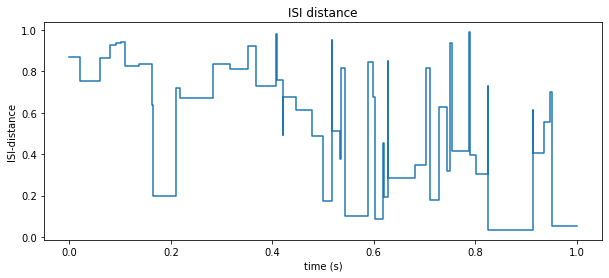

In [6]:
# compute ISI profile
isi_profile = spk.isi_profile(st1, st2)
t_isi_distance, isi_distance = isi_profile.get_plottable_data()

# plot
fig, ax = plt.subplots(figsize=[10,4])
ax.plot(t_isi_distance, isi_distance)
ax.set(xlabel="time (s)", ylabel="ISI-distance")
ax.set_title("ISI distance")
plt.show()

### SPIKE-distance

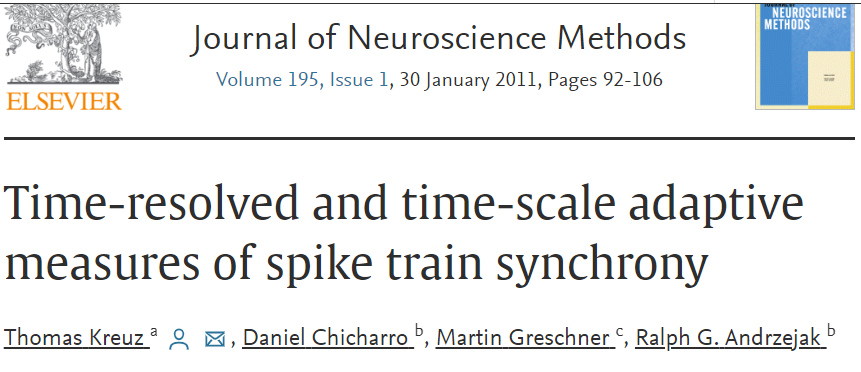

In [7]:
display.Image('../figures/ipynb_images/kruez_2011.png')

Advantages:
* Parameter free
* Timescale independent
* Firing-rate adaptive
  
Novelty: 
* Designed to be sensitive to coincident spikes
* Evaluated at each time step (while ISI-distance is evaluated at spike times)
  
Disadvantages:
* Can yield spuriously high values for event-like firing

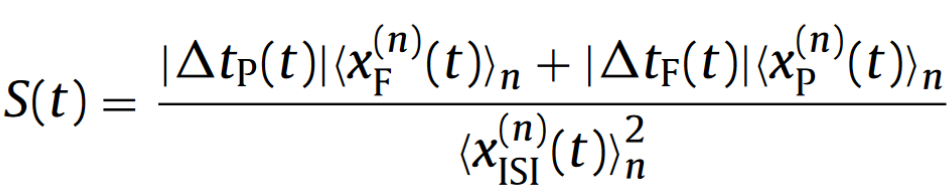

In [8]:
display.Image('../figures/ipynb_images/kruez_2011_eq9.png')

Equation 9.  
Kreuz T, Chicharro D, Greschner M, Andrzejak RG. Time-resolved and time-scale adaptive measures of spike train synchrony. J Neurosci Methods. 2011 Jan 30;195(1):92-106. doi: 10.1016/j.jneumeth.2010.11.020. Epub 2010 Dec 1. PMID: 21129402.

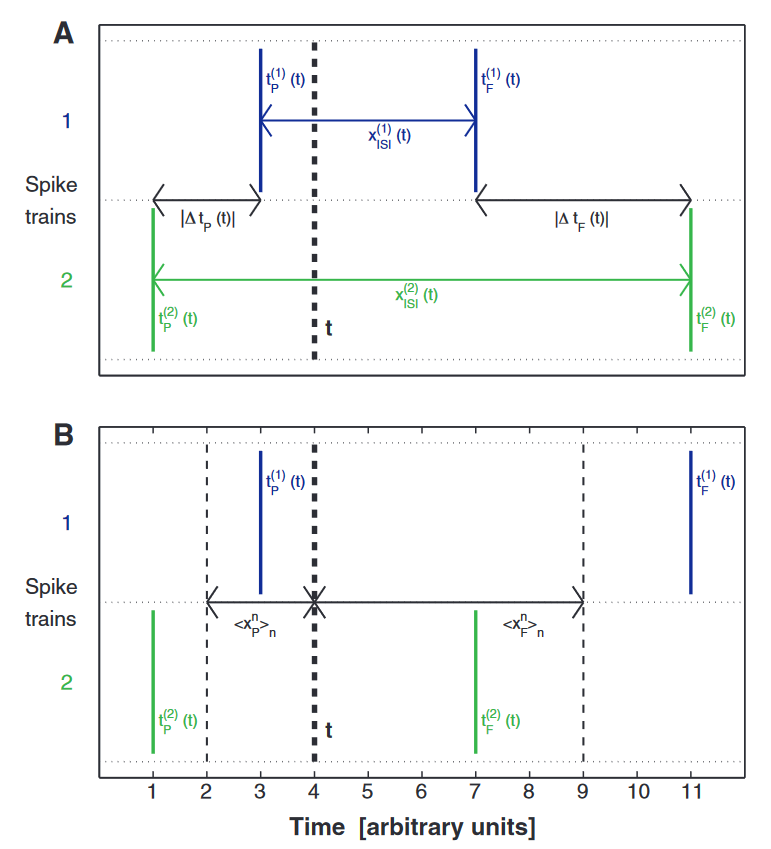

In [9]:
display.Image('../figures/ipynb_images/kruez_2011_fig1.png')

Figure 1.  
Kreuz T, Chicharro D, Greschner M, Andrzejak RG. Time-resolved and time-scale adaptive measures of spike train synchrony. J Neurosci Methods. 2011 Jan 30;195(1):92-106. doi: 10.1016/j.jneumeth.2010.11.020. Epub 2010 Dec 1. PMID: 21129402.

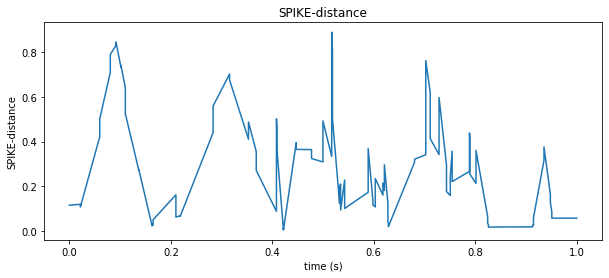

In [10]:
# compute SPIKE-distance profile
spike_dist_profile = spk.spike_profile(st1, st2)
t_spike_distance, spike_distance = spike_dist_profile.get_plottable_data()

# plot
fig, ax = plt.subplots(figsize=[10,4])
ax.plot(t_spike_distance, spike_distance)
ax.set(xlabel="time (s)", ylabel="SPIKE-distance")
ax.set_title("SPIKE-distance")
plt.show()

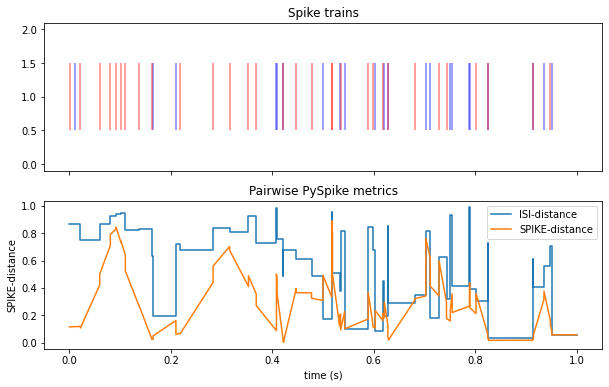

In [11]:
# Plot metric together

# create fig
fig, (ax1,ax2) = plt.subplots(2,1, figsize=[10,6], sharex=True)

# plot spikes 
ax1.eventplot(st1.spikes, color='b', alpha=0.5)
ax1.eventplot(st2.spikes, color='r', alpha=0.5)
ax1.set_title("Spike trains")

# plot each metric
ax2.plot(t_isi_distance, isi_distance, label="ISI-distance")
ax2.plot(t_spike_distance, spike_distance, label="SPIKE-distance")

# label
ax2.set(xlabel="time (s)", ylabel="SPIKE-distance")
ax2.set_title("Pairwise PySpike metrics")
ax2.legend()

plt.show()

### SPIKE-synchronization

Multivariate extension of event synchronization (Quian Quiroga et al. 2002)

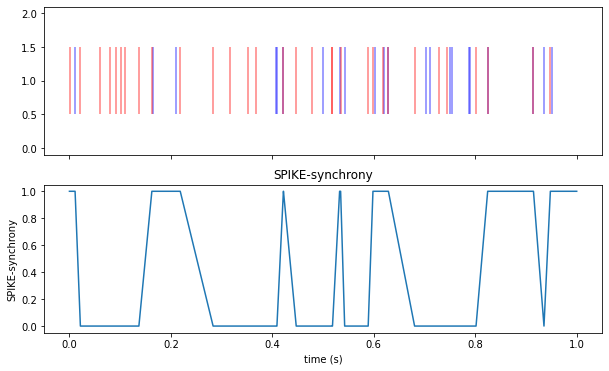

In [16]:
# compute SPIKE-synchrony profile
spike_sync_profile = spk.spike_sync_profile(st1, st2)
t_spike_synchrony, spike_synchrony = spike_sync_profile.get_plottable_data()

# plot
fig, (ax1,ax2) = plt.subplots(2,1, figsize=[10,6], sharex=True)
ax1.eventplot(st1.spikes, color='b', alpha=0.5)
ax1.eventplot(st2.spikes, color='r', alpha=0.5)

ax2.plot(t_spike_synchrony, spike_synchrony)
ax2.set(xlabel="time (s)", ylabel="SPIKE-synchrony")
ax2.set_title("SPIKE-synchrony")
plt.show()

### Computing multivariate profiles and distances

In [13]:
# simulate 10 spike trains
spike_trains = []
for i in range(10):
    spike_trains.append(spk.generate_poisson_spikes(rate=10, interval=[0, 1]))

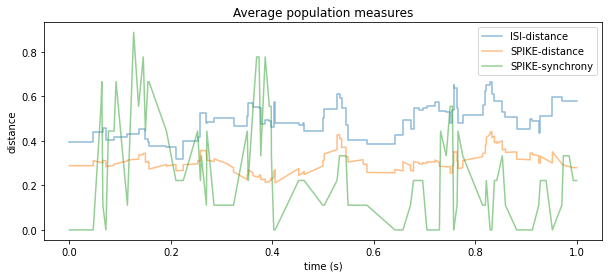

In [14]:
# average population measures

# compute
avrg_isi_profile = spk.isi_profile(spike_trains)
avrg_spike_profile = spk.spike_profile(spike_trains)
avrg_spike_sync_profile = spk.spike_sync_profile(spike_trains)

# get plottable data
t_avrg_isi_distance, avrg_isi_distance = avrg_isi_profile.get_plottable_data()
t_avrg_spike_distance, avrg_spike_distance = avrg_spike_profile.get_plottable_data()
t_avrg_spike_synchrony, avrg_spike_synchrony = avrg_spike_sync_profile.get_plottable_data()

# plot
fig, ax = plt.subplots(figsize=[10,4])
ax.plot(t_avrg_isi_distance, avrg_isi_distance, alpha=0.5, label="ISI-distance")
ax.plot(t_avrg_spike_distance, avrg_spike_distance, alpha=0.5, label="SPIKE-distance")
ax.plot(t_avrg_spike_synchrony, avrg_spike_synchrony, alpha=0.5, label="SPIKE-synchrony")
ax.set(xlabel="time (s)", ylabel="distance")
ax.set_title("Average population measures")
ax.legend()
plt.show()

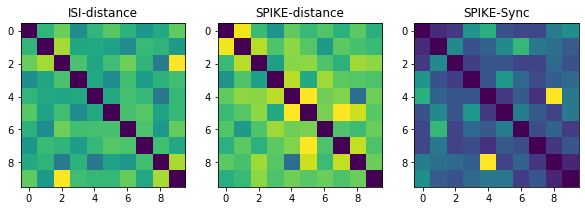

In [15]:
# pairwise measures

# compute
isi_distance = spk.isi_distance_matrix(spike_trains)
spike_distance = spk.spike_distance_matrix(spike_trains)
spike_sync = spk.spike_sync_matrix(spike_trains)

# plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[10,4])

ax1.imshow(isi_distance, interpolation='none')
ax1.set_title("ISI-distance")

ax2.imshow(spike_distance, interpolation='none')
ax2.set_title("SPIKE-distance")

ax3.imshow(spike_sync, interpolation='none')
ax3.set_title("SPIKE-Sync")

plt.show()